In [ ]:
## Installing yahoo finance
!pip install yfinance
!pip install pmdarima

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from pmdarima import auto_arima
import pmdarima as pm

In [ ]:
#Data collecting from yahoo finance
df_tesla = yf.download('TSLA', start= '2019-01-01', end='2024-09-30')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df_tesla.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2019-01-02,20.674667,20.674667,21.008667,19.920000,20.406668,174879000
2019-01-03,20.024000,20.024000,20.626667,19.825333,20.466667,104478000
2019-01-04,21.179333,21.179333,21.200001,20.181999,20.400000,110911500
2019-01-07,22.330667,22.330667,22.449333,21.183332,21.448000,113268000
2019-01-08,22.356667,22.356667,22.934000,21.801332,22.797333,105127500


In [ ]:
df_tesla.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2024-09-23,250.000000,250.000000,250.000000,241.919998,242.610001,86927200
2024-09-24,254.270004,254.270004,257.190002,249.050003,254.080002,88491000
2024-09-25,257.019989,257.019989,257.049988,252.279999,252.539993,65034300
2024-09-26,254.220001,254.220001,261.750000,251.529999,260.600006,67142200
2024-09-27,260.459991,260.459991,260.700012,254.119995,257.380005,70988100


EDA and Preprocessing part

<Axes: xlabel='Date'>

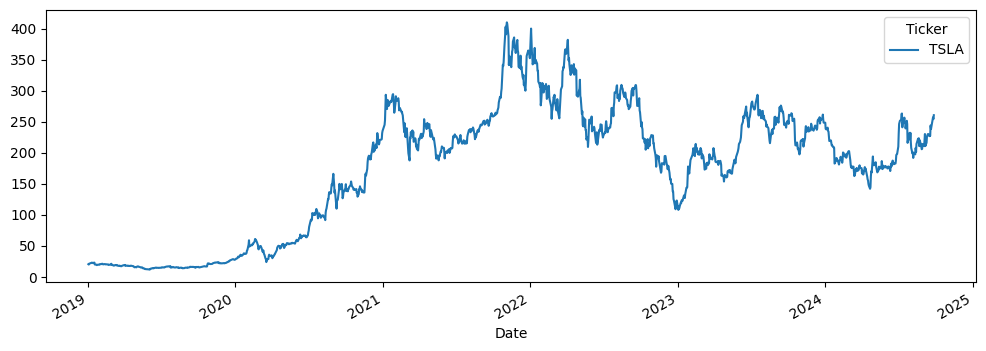

In [ ]:
df_tesla['Close'].plot(figsize=(12,4))

In [ ]:
#Checking missing values
df_tesla.isnull().sum()
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1445 entries, 2019-01-02 to 2024-09-27
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  1445 non-null   float64
 1   (Close, TSLA)      1445 non-null   float64
 2   (High, TSLA)       1445 non-null   float64
 3   (Low, TSLA)        1445 non-null   float64
 4   (Open, TSLA)       1445 non-null   float64
 5   (Volume, TSLA)     1445 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 79.0 KB


In [ ]:
#Finding number of duplicates
duplicates = df_tesla.duplicated()
print('Number of duplicate rows = %d' % (duplicates.sum()))

Number of duplicate rows = 0


In [ ]:
## Datetime Index
df_tesla.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2024-09-16', '2024-09-17', '2024-09-18', '2024-09-19',
               '2024-09-20', '2024-09-23', '2024-09-24', '2024-09-25',
               '2024-09-26', '2024-09-27'],
              dtype='datetime64[ns]', name='Date', length=1445, freq=None)

In [ ]:
df_tesla.index = pd.to_datetime(df_tesla.index)

Time Resampling

In [ ]:
df_tesla.resample(rule='M').max()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2019-01-31,23.153999,23.153999,23.466667,22.943333,23.080667,362262000
2019-02-28,21.423332,21.423332,21.615999,21.041332,21.306000,167758500
2019-03-31,19.652666,19.652666,20.475332,19.459999,20.462667,343671000
2019-04-30,19.454000,19.454000,19.744667,19.144667,19.219999,355810500
2019-05-31,17.022667,17.022667,17.223333,16.566668,17.120001,398206500
...,...,...,...,...,...,...
2024-05-31,186.600006,186.600006,187.559998,182.199997,183.800003,115266500
2024-06-30,197.880005,197.880005,203.199997,195.259995,199.550003,118984100


<Axes: xlabel='Date'>

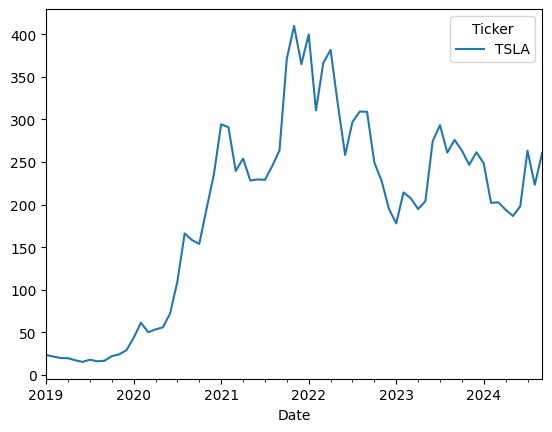

In [ ]:
##Monthly start frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_tesla.resample(rule='M').max()['Close'].plot()

<Axes: xlabel='Date'>

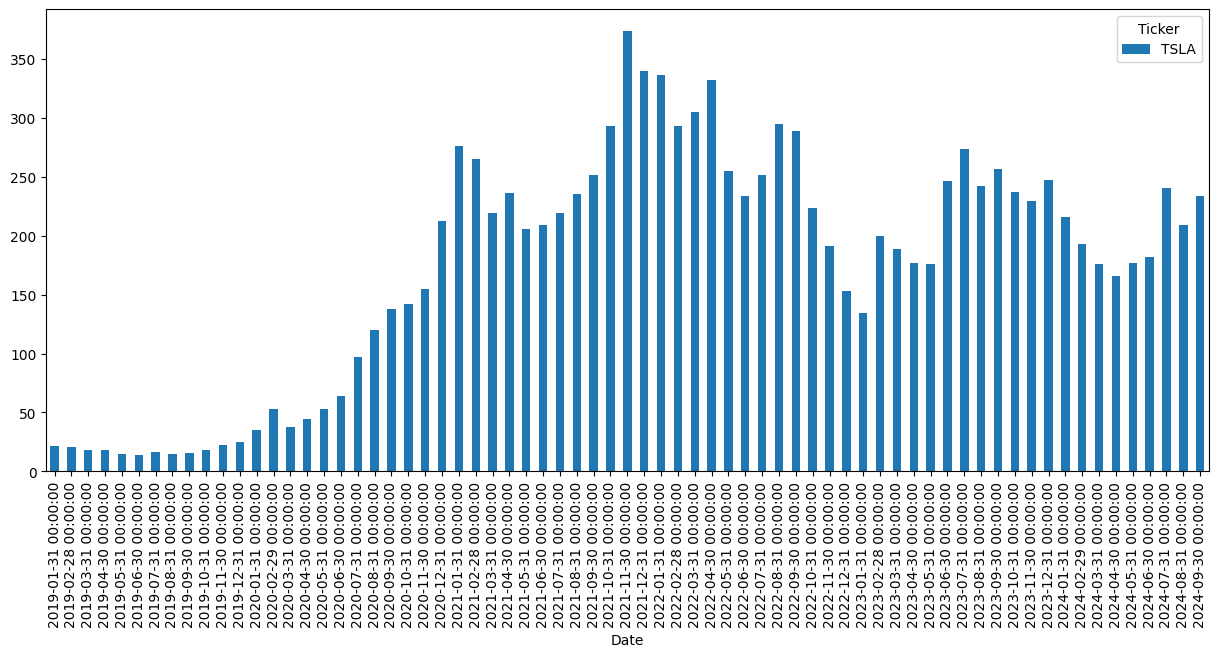

In [ ]:
##plotting
df_tesla['Close'].resample(rule='M').mean().plot(kind='bar',figsize=(15,6))

In [ ]:
df_tesla_resam = df_tesla.resample(rule='M').mean()

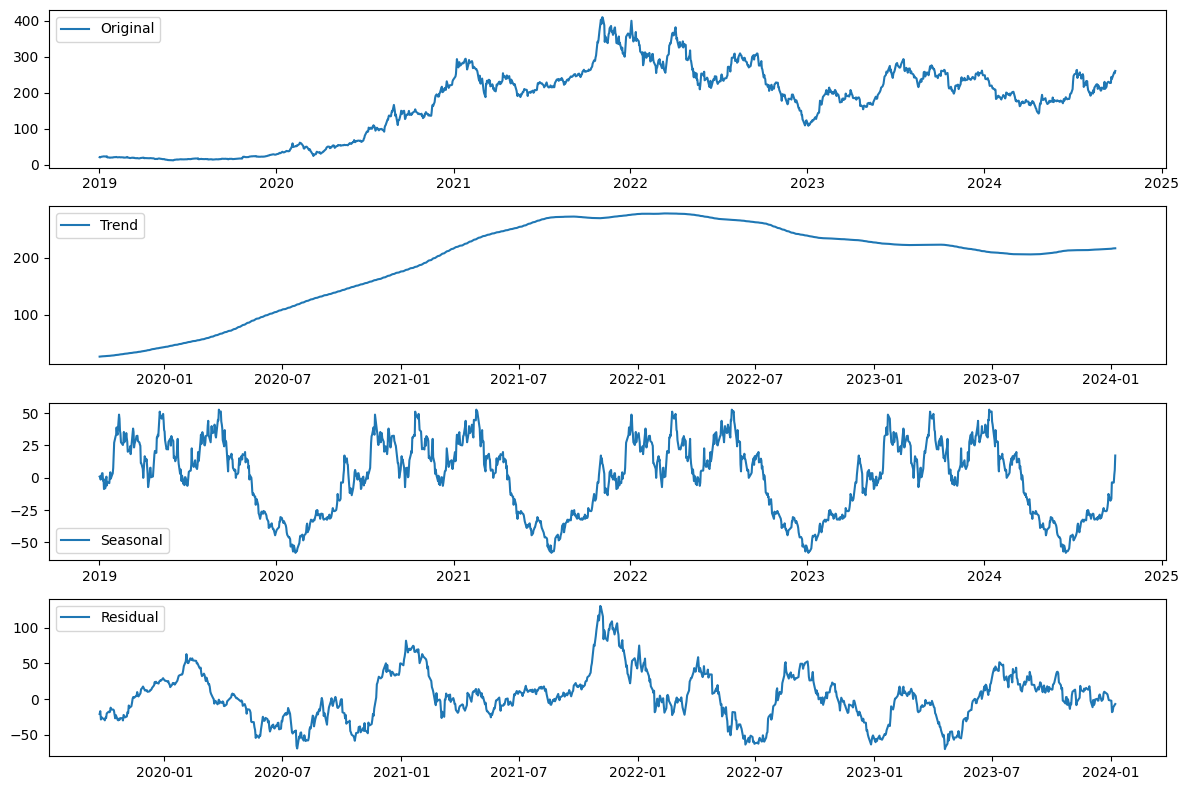

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the series with model add
decomposition_add  = seasonal_decompose(df_tesla['Close'], model='additive', period=365)

trend_add = decomposition_add.trend
seasonal_add = decomposition_add.seasonal
residual_add = decomposition_add.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df_tesla['Close'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend_add, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal_add, label='Seasonal')
plt.legend(loc='lower left')

plt.subplot(414)
plt.plot(residual_add, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Check Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adf_test = adfuller(df_tesla_resam['Close'])

In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df_tesla_resam['Close'].dropna())

ADF Statistics: -1.6329848116940309
p- value: 0.46592873302451
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
## Use Techniques differencing
df_tesla_diff = df_tesla_resam['Close'].diff().dropna()
df_tesla_diff.head()

Ticker,TSLA
Date,
2019-02-28,-0.717725
2019-03-31,-1.998085
2019-04-30,-0.740095
2019-05-31,-3.129350
2019-06-30,-0.399930


In [ ]:
adf_test(df_tesla_diff.dropna())

ADF Statistics: -7.220724481011202
p- value: 2.1148559609065778e-10
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

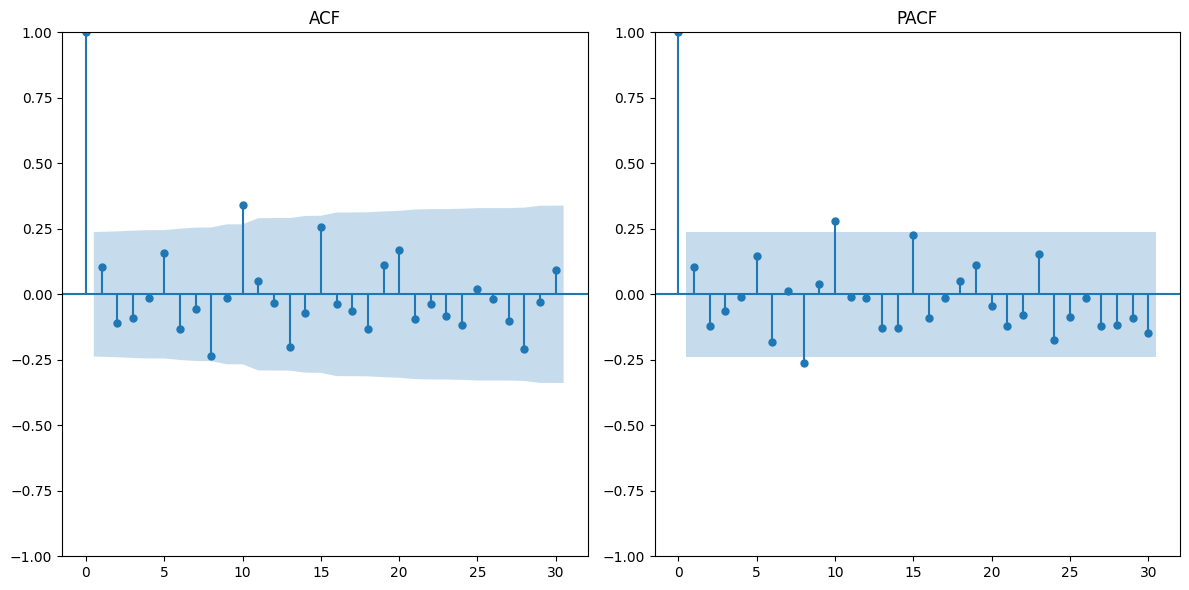

In [ ]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df_tesla_diff.dropna(), lags=30, ax=plt.gca())
plt.title("ACF")

plt.subplot(122)
plot_pacf(df_tesla_diff.dropna(), lags=30, ax=plt.gca())
plt.title("PACF")
plt.tight_layout()
plt.show()

Finding the parameters

In [ ]:
# Fit auto_arima model
auto_model = pm.auto_arima(df_tesla_diff, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

# Print model summary
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=4.89 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=658.203, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=659.322, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=659.112, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=659.468, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 5.568 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   68
Model:                        SARIMAX   Log Likelihood                -328.102
Date:                Tue, 31 Dec 2024   AIC                            658.203
Time:                        19:18:14   BIC                            660.423
Sample:                    02-28-2019   HQIC                           659.083
                        

In [76]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [77]:
#Train-Test Split
train_size = int(len(df_tesla_diff) * 0.8)
#test_size = len(df_tesla_diff) - train_size
train_data, test_data = df_tesla_diff[:train_size], df_tesla_diff[train_size:]

In [78]:
#Fitting ARIMA Model
# Using auto_arima p, d, q values
model = ARIMA(train_data, order=(0, 0 , 0))
arima_result = model.fit()

# Display Model Summary
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                   TSLA   No. Observations:                   54
Model:                          ARIMA   Log Likelihood                -261.904
Date:                Tue, 31 Dec 2024   AIC                            527.808
Time:                        20:47:09   BIC                            531.786
Sample:                    02-28-2019   HQIC                           529.342
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6717      4.208      1.110      0.267      -3.576      12.919
sigma2       955.6599    158.630      6.024      0.000     644.751    1266.569
Ljung-Box (L1) (Q):                   1.82   Jarque-

In [79]:
#Test data Forecasting
forecast = arima_result.forecast(steps=len(test_data))

In [80]:
#Evaluating the Model
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 26.323320551013158


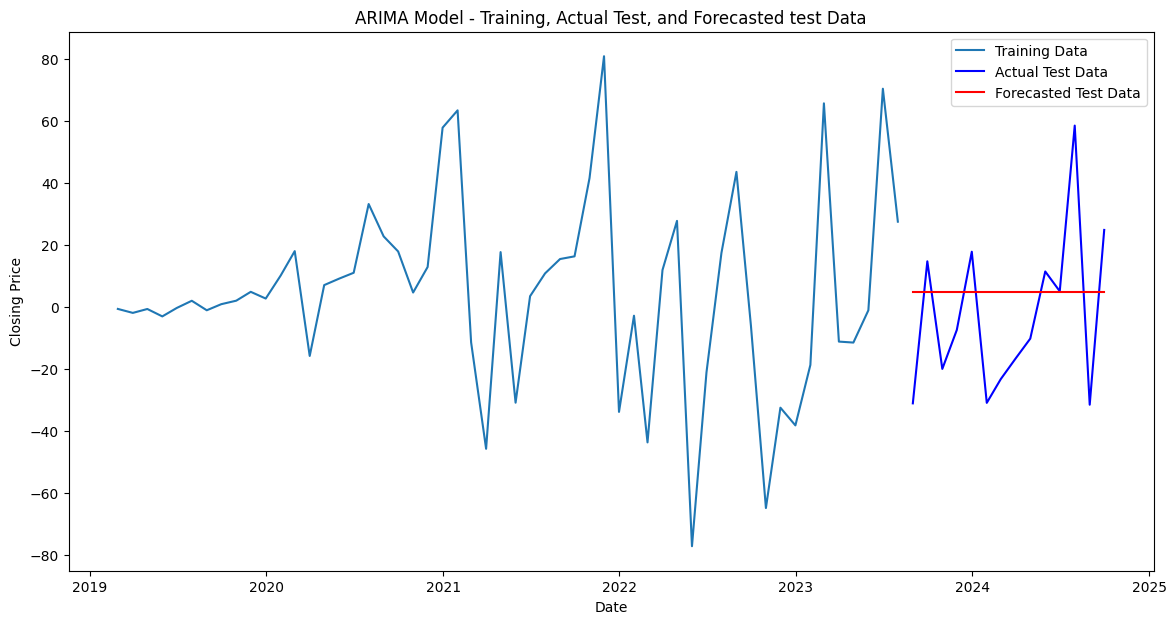

In [81]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(train_data, label="Training Data")
plt.plot(test_data, label="Actual Test Data", color='blue')
plt.plot(forecast, label="Forecasted Test Data", color='red')
plt.legend()
plt.title("ARIMA Model - Training, Actual Test, and Forecasted test Data")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()